In [18]:
import pandas as pd
import os
os.chdir(r"C:\Users\0yeon\SWING 2023\project\data")

In [19]:
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [20]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows, Mac일 때는 AppleGothic
#matplotlib.rcParams['font.family'] = 'HYGungSo-Bold'# 궁서체
matplotlib.rcParams['font.size'] = 15 # 폰트 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시 마이너스 글자가 깨지는 것방지

In [21]:
df = pd.read_csv("202306.csv", engine = "python",encoding = "CP949")
df.head()

,일,검색량,최저기온
0,1,13.61974,19.7
1,2,14.15513,17.9
2,3,12.91459,16.6
3,4,13.67197,16.9
4,5,13.90049,17.6


In [22]:
x = np.array(df['검색량'])
x = x[:, np.newaxis]
x_scaler = StandardScaler()
x_scaled_data = x_scaler.fit_transform(x)

y = np.array(df['최저기온'])
y = y[:, np.newaxis]
y_scaler = StandardScaler()
y_scaled_data = y_scaler.fit_transform(y)

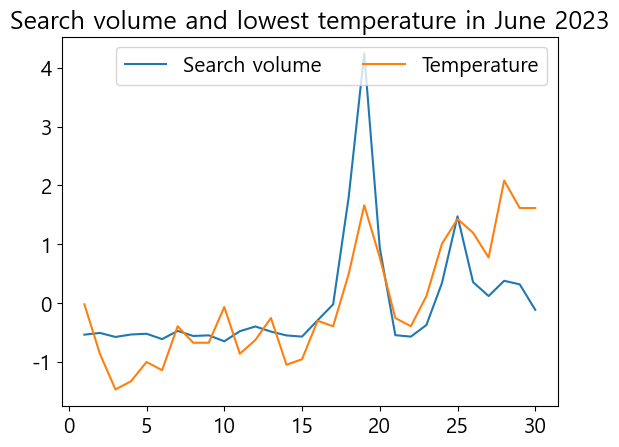

In [23]:
# 그래프 그리기
plt.title("Search volume and lowest temperature in June 2023")
plt.plot(df['일'], x_scaled_data, label="Search volume")
plt.plot(df['일'], y_scaled_data, label="Temperature")
plt.legend(ncol=2)
plt.savefig('Search volume and lowest temperature in June 2023.png', dpi=400)

In [24]:
regr = linear_model.LinearRegression()
regr.fit(x_scaled_data, y_scaled_data)
coef = regr.coef_
intercept = regr.intercept_
score = regr.score(x_scaled_data, y_scaled_data)
print(coef, intercept)

[[0.64303279]] [-1.41027028e-15]


In [25]:
import pandas as pd

ds = pd.DataFrame({'a': x_scaled_data.flatten(), 'b': y_scaled_data.flatten()})
corr_matrix = ds.corr()
corr_coeff = corr_matrix.loc['a', 'b']
print('상관계수:', corr_coeff)

상관계수: 0.6430327880965667
